In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
% matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd_train = pd.read_csv('/content/drive/MyDrive/Datasets/fashion-mnist_train.csv')

In [4]:
pd_test = pd.read_csv('/content/drive/MyDrive/Datasets/fashion-mnist_test.csv')

In [5]:
X_train = np.array(pd_train.drop('label',axis=1)).T/255
X_test =np.array(pd_test.drop('label',axis=1)).T/255

In [6]:
Y_train = np.zeros((10,60000))
y = np.array(pd_train['label'])
for i in range(60000):
  classs = y[i]
  Y_train[:,i][classs] = 1
Y_train.shape

(10, 60000)

In [7]:
Y_test = np.zeros((10,10000))
y1 = np.array(pd_test['label'])
for i in range(10000):
  classs = y1[i]
  Y_train[:,i][classs] = 1
Y_train.shape

(10, 60000)

In [8]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 60000)
shape of Y_train : (10, 60000)
shape of X_test : (784, 10000)
shape of Y_test : (10, 10000)


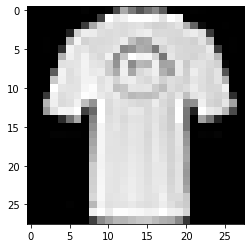

In [9]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

In [10]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0.001*x)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [32]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

In [13]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

In [31]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [15]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [36]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(20) == 0):
          print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [37]:
iterations = 600
n_h = 10
learning_rate = 2.0
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.6481317465018237
Cost after 20 iterations is : 2.594160482329562
Cost after 40 iterations is : 2.54124491156086
Cost after 60 iterations is : 2.4861222917247914
Cost after 80 iterations is : 2.4274925076642204
Cost after 100 iterations is : 2.3655687643488426
Cost after 120 iterations is : 2.3016870706486476
Cost after 140 iterations is : 2.237686732724199
Cost after 160 iterations is : 2.1754571479180616
Cost after 180 iterations is : 2.1165023325835257
Cost after 200 iterations is : 2.061861090125143
Cost after 220 iterations is : 2.012175169226622
Cost after 240 iterations is : 1.9677128048116235
Cost after 260 iterations is : 1.9284834090052467
Cost after 280 iterations is : 1.8942769043332235
Cost after 300 iterations is : 1.8647564646098986
Cost after 320 iterations is : 1.8394847414818352
Cost after 340 iterations is : 1.818004553555233
Cost after 360 iterations is : 1.7998732120628382
Cost after 380 iterations is : 1.7846735308142558
Cost after 40

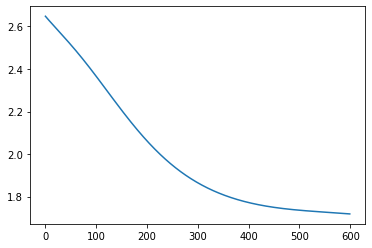

In [38]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [39]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [40]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 60.01166666666666 %
Accuracy of Test Dataset 11.68 %


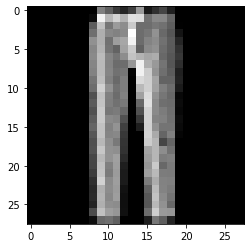

Our model says it is : 1


In [ ]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])